In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [2]:
data = pd.read_excel('D:\\DSA\Python\\Case Study 7\\iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

# Pre-processing steps

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


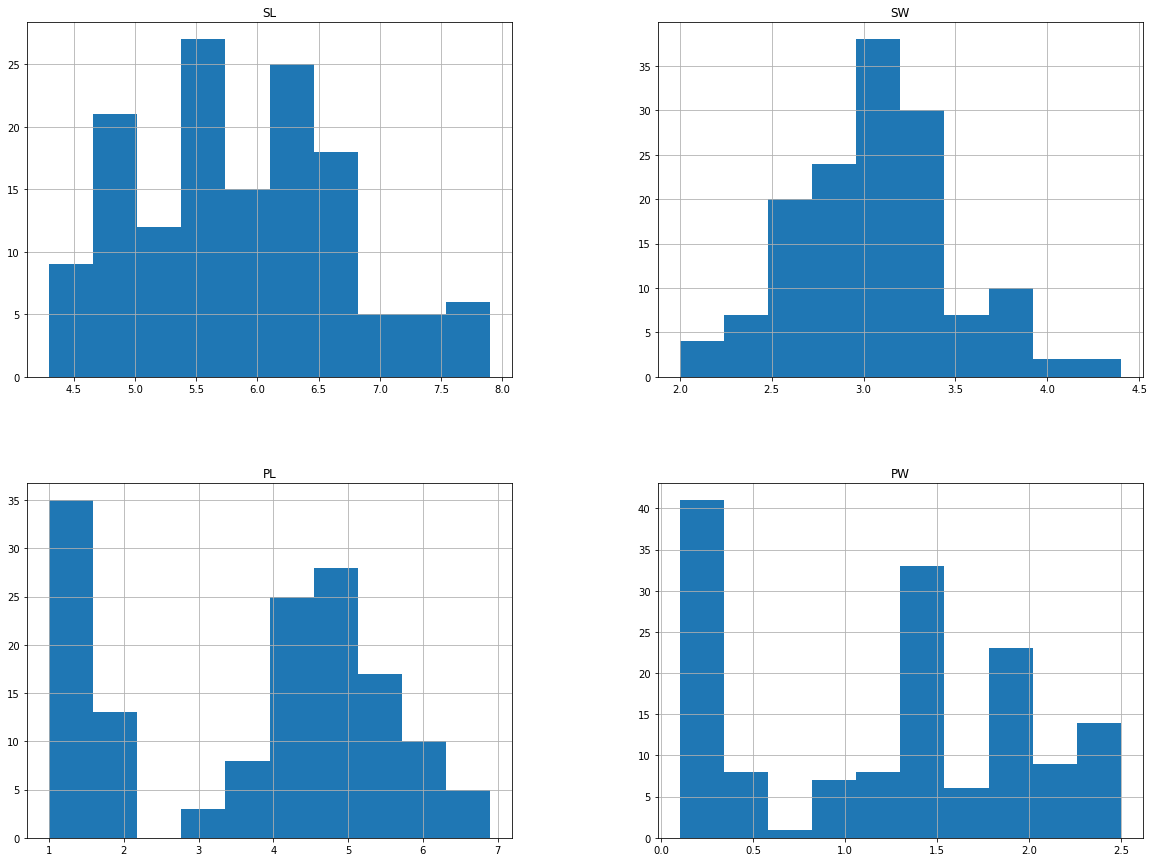

In [7]:
freqgraph = data.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
for i in ['SL','SW','PL']:
    data[i] = data[i].fillna(data[i].mean())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Box plot of SL')

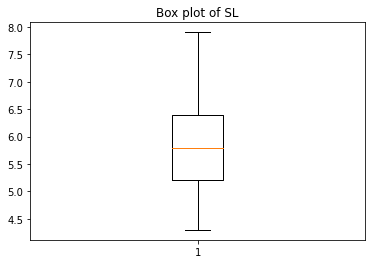

In [11]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of SW')

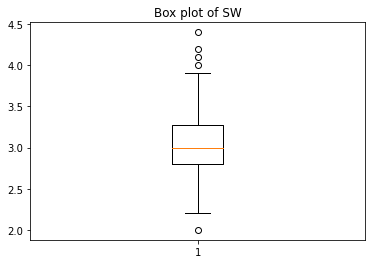

In [12]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [13]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')

In [14]:
IQR = Q3-Q1

In [15]:
low_limt = Q1-1.5*IQR
up_limt = Q3+1.5*IQR

In [16]:
print(low_limt)
print(up_limt)

2.1249999999999996
3.9250000000000003


In [17]:
outlier = []
for x in data['SW']:
    if((x>up_limt) or (x<low_limt)):
        outlier.append(x)

In [18]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [19]:
ind1 = data['SW']>up_limt
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [20]:
data.drop([  14, 15, 32, 33], inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

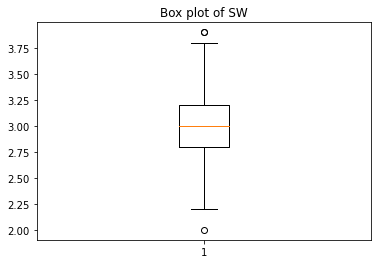

In [21]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Text(0.5, 1.0, 'Box plot of PL')

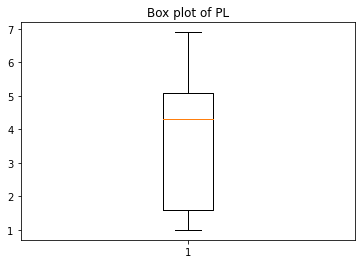

In [22]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

Text(0.5, 1.0, 'Box plot of PW')

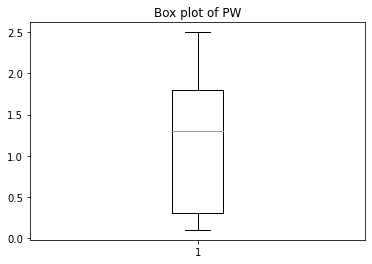

In [23]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

In [24]:
data.shape

(146, 5)

In [25]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [26]:
y = data['Classification']
x = data.drop('Classification', axis =1)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

C:\Users\Adrash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = logit_model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [32]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.9333333333333333


In [33]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [35]:
acc_values

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

Text(0, 0.5, 'Accuracy')

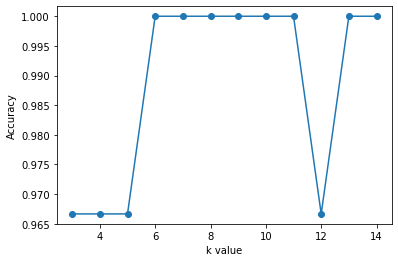

In [36]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [37]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [38]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.9666666666666667


In [39]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [40]:
data.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,5.864326,3.018465,3.820805,1.225342
std,0.817050,0.382594,1.703421,0.755834
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.300000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [42]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [43]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.9333333333333333


In [44]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 10]], dtype=int64)

In [45]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

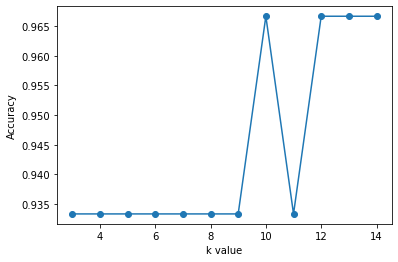

In [46]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [47]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [48]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.9333333333333333


In [49]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

KNN model gives the best result  

In [50]:
'price_range'

'price_range'